In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/coin_Bitcoin.csv')

In [20]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [21]:
# Remove null & duplicate values
df.dropna(inplace=True)  
df.drop_duplicates(inplace=True)
df['Date'] = pd.to_datetime(df['Date']) # Convert 'date' column to proper format
df.dtypes

SNo                   int64
Name                 object
Symbol               object
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object

# Distribution Analysis

In [22]:
df.describe(exclude=['datetime', 'int64', 'object'])

,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [23]:
# Filter out the rows where volume = 0 
first_valid_idx = df[df['Volume'] > 0].index[0]
df = df.loc[first_valid_idx:]

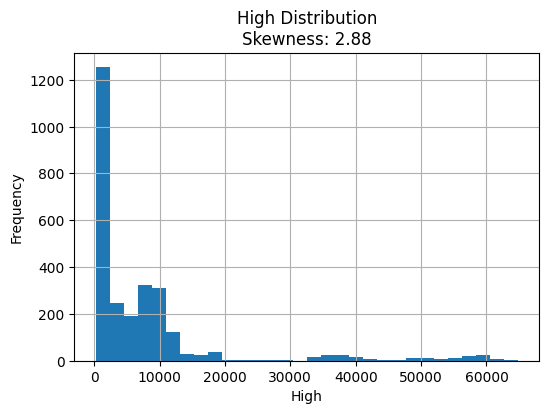

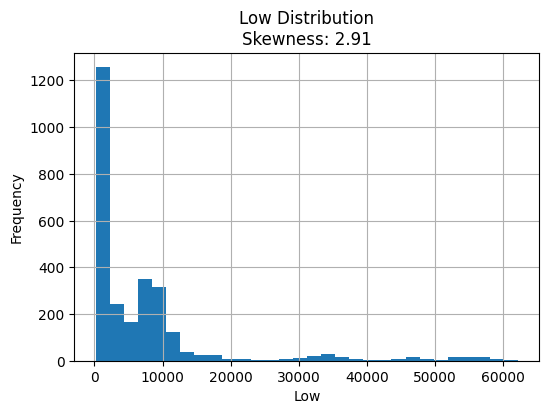

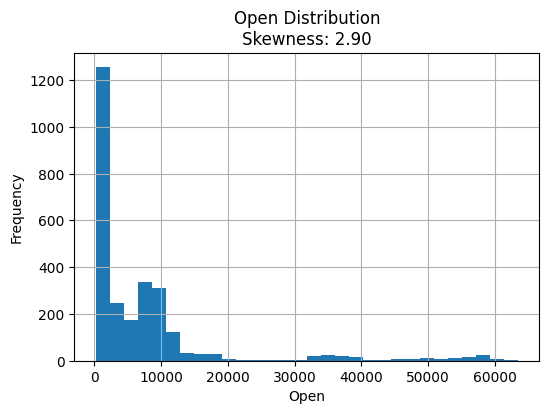

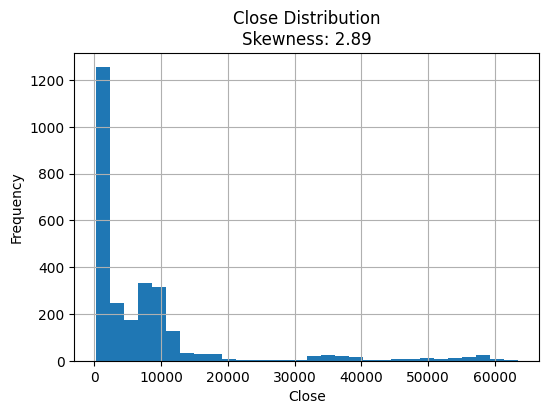

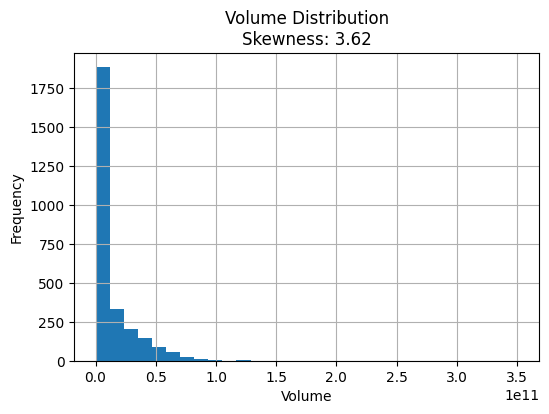

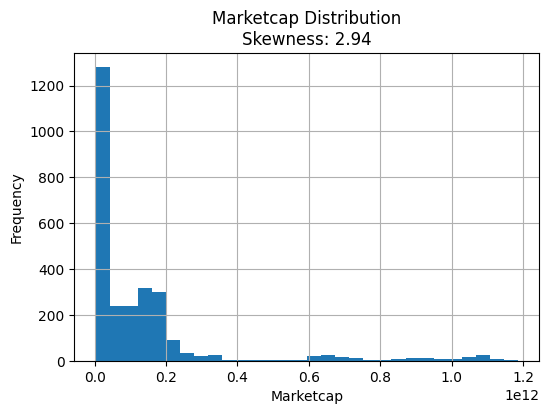

In [24]:
from scipy.stats import skew

cols = ['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']

for col in cols:
    plt.figure(figsize=(6, 4))
    skew_value = skew(df[col])
    plt.hist(df[col], bins=30)
    plt.title(f'{col} Distribution\nSkewness: {skew_value:.2f}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Findings
The distribution of all selected financial columns (High, Low, Open, Close, Volume, Marketcap) shows strong right skewness. This suggests the presence of extreme outliers or highly concentrated values in the upper range.
- To address this, we'll apply a logarithmic transformation to the dataset

In [25]:
import numpy as np
# Apply log transformation to each col
for col in cols:
    df[f'{col}_log'] = np.log(df[col])

df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,High_log,Low_log,Open_log,Close_log,Volume_log,Marketcap_log
242,243,Bitcoin,BTC,2013-12-27 23:59:59,777.510010,713.599976,763.280029,735.070007,46862700.0,8.955395e+09,6.656097,6.570323,6.637625,6.599966,17.662733,22.915522
243,244,Bitcoin,BTC,2013-12-28 23:59:59,747.059998,705.349976,737.979980,727.830017,32505800.0,8.869919e+09,6.616145,6.558694,6.603917,6.590068,17.296929,22.905931
244,245,Bitcoin,BTC,2013-12-29 23:59:59,748.609985,714.440002,728.049988,745.049988,19011300.0,9.082104e+09,6.618218,6.571499,6.590370,6.613451,16.760544,22.929572
245,246,Bitcoin,BTC,2013-12-30 23:59:59,766.599976,740.239990,741.349976,756.130005,20707700.0,9.217168e+09,6.641965,6.606974,6.608473,6.628213,16.846016,22.944334
246,247,Bitcoin,BTC,2013-12-31 23:59:59,760.580017,738.169983,760.320007,754.010010,20897300.0,9.191325e+09,6.634081,6.604174,6.633739,6.625406,16.855131,22.941526


# Correlation Analysis

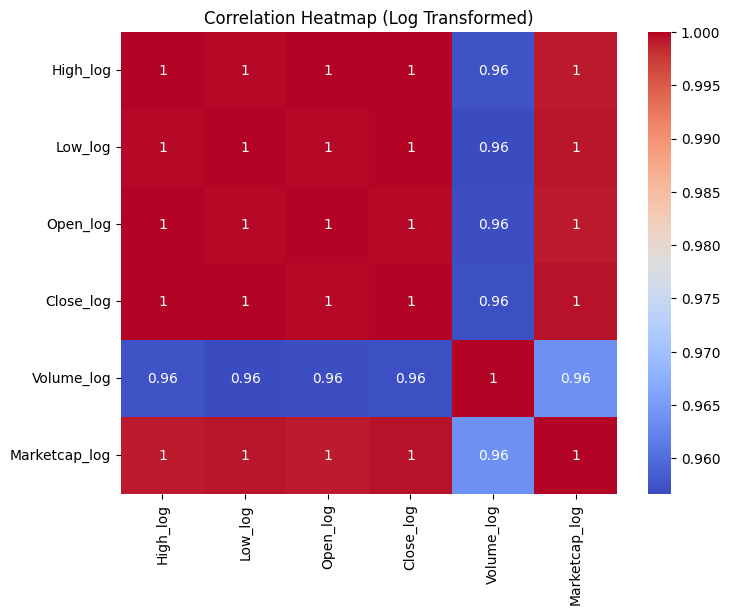

In [26]:
import seaborn as sns

# Correlation heatmap
cols = ['High_log', 'Low_log', 'Open_log', 'Close_log', 'Volume_log', 'Marketcap_log']

corr = df[cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Log Transformed)')
plt.show()

# Findings
- The heatmap shows a relatively tight correlation, revealing that each variables are very dependent on one another.
- To get more meaningful insights, we could potentially look at daily returns.

# Time-series Analysis

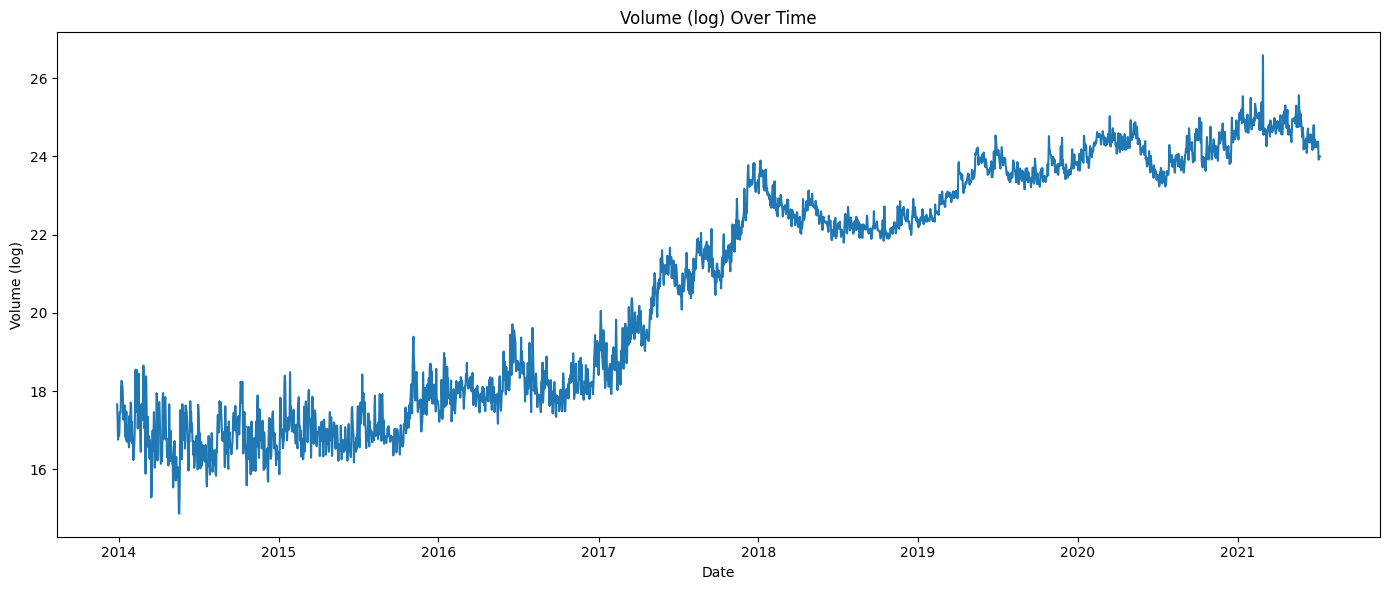

In [27]:
# Plot the line graph of volume over time
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Volume_log'])
plt.xlabel('Date')
plt.ylabel('Volume (log)')
plt.title('Volume (log) Over Time')
plt.tight_layout()
plt.show()

## Findings
The line graph visualizes Bitcoin's trading volume over a long period (2013 - 2021), revealing a spike in the years 2017-2018.
- To detect anomalies, the rolling z-score method will be used. This approach compares each data point to the mean and standard deviation of a moving window, allowing us to assess the spike relative to recent volume behavior rather than the entire dataset.

In [28]:
import matplotlib.dates as mdates

def detect_and_plot_anomalies(df, column, window=30, threshold=3):
    """
    Detect anomalies in a specified column of a DataFrame using rolling z-score,
    then plot the column with anomalies highlighted.
    """
    rolling_mean = df[column].rolling(window=window).mean()
    rolling_std = df[column].rolling(window=window).std()

    df[f'{column}_zscore'] = (df[column] - rolling_mean) / rolling_std
    df[f'{column}_anomaly'] = df[f'{column}_zscore'].abs() > threshold

    plt.figure(figsize=(14,6))
    plt.plot(df['Date'], df[column], label=column)
    plt.scatter(df[df[f'{column}_anomaly']]['Date'], df[df[f'{column}_anomaly']][column], color='red', label='Anomaly')
    plt.gca().xaxis.set_major_locator(mdates.YearLocator()) 
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # Show the year only (e.g. 2013)
    plt.legend()
    plt.title(f'{column} with Anomalies (Rolling Z-Score)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return df

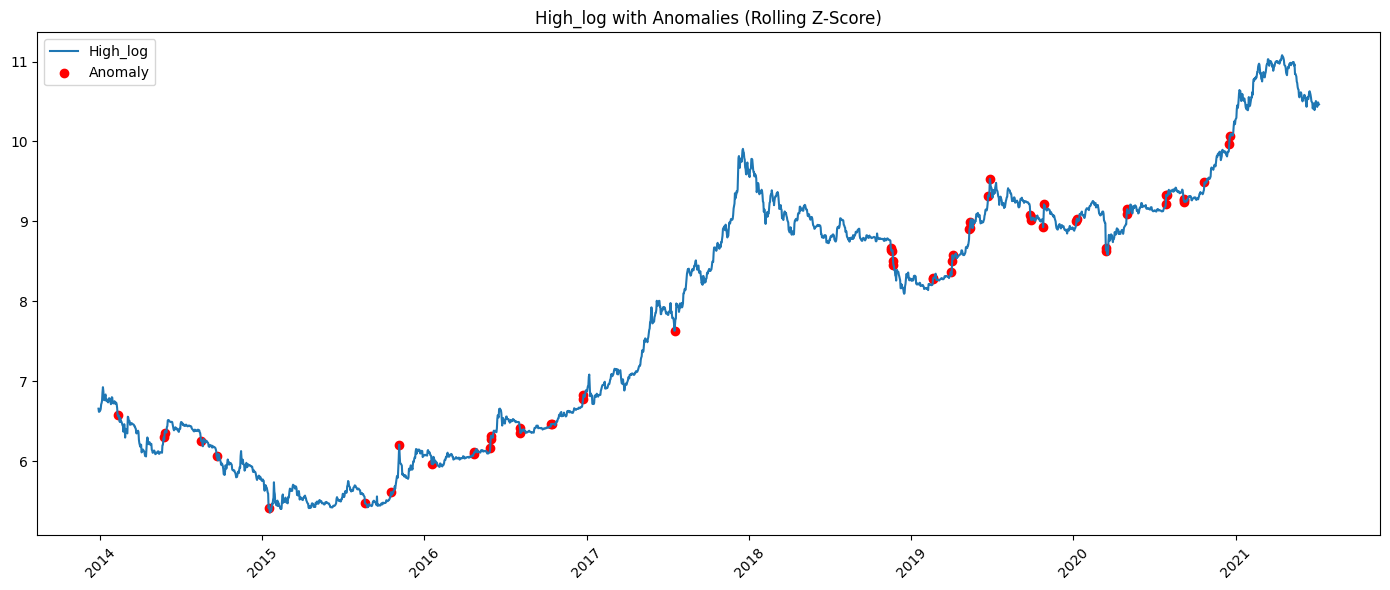

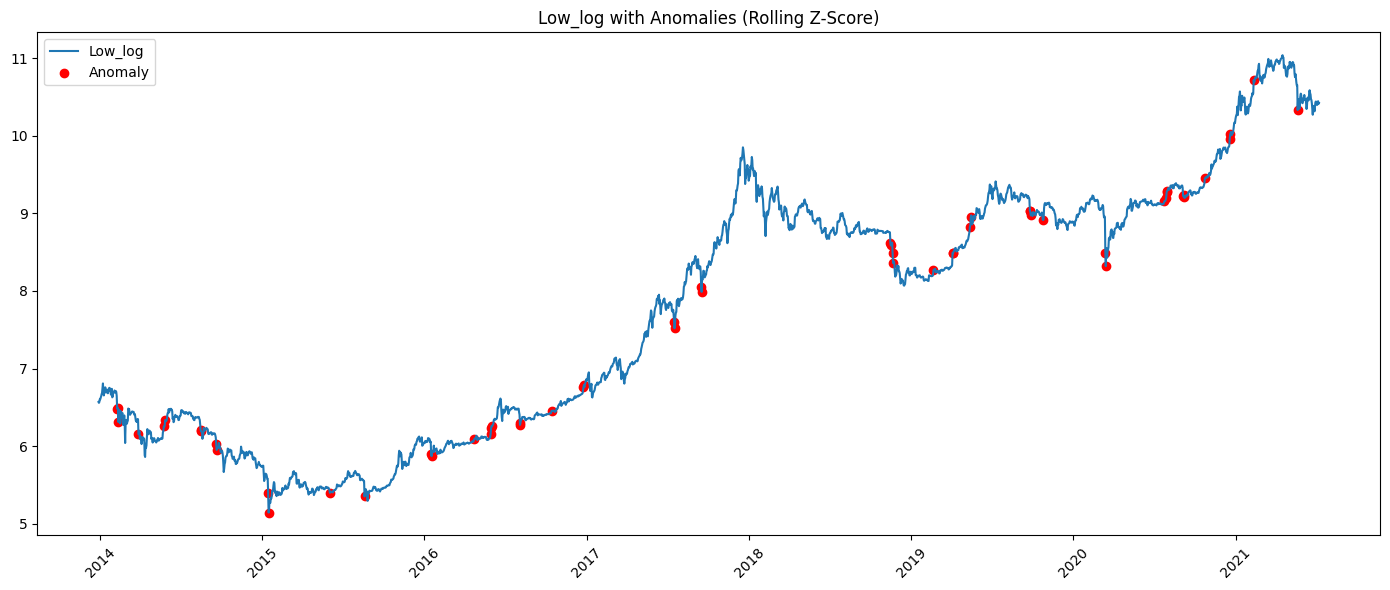

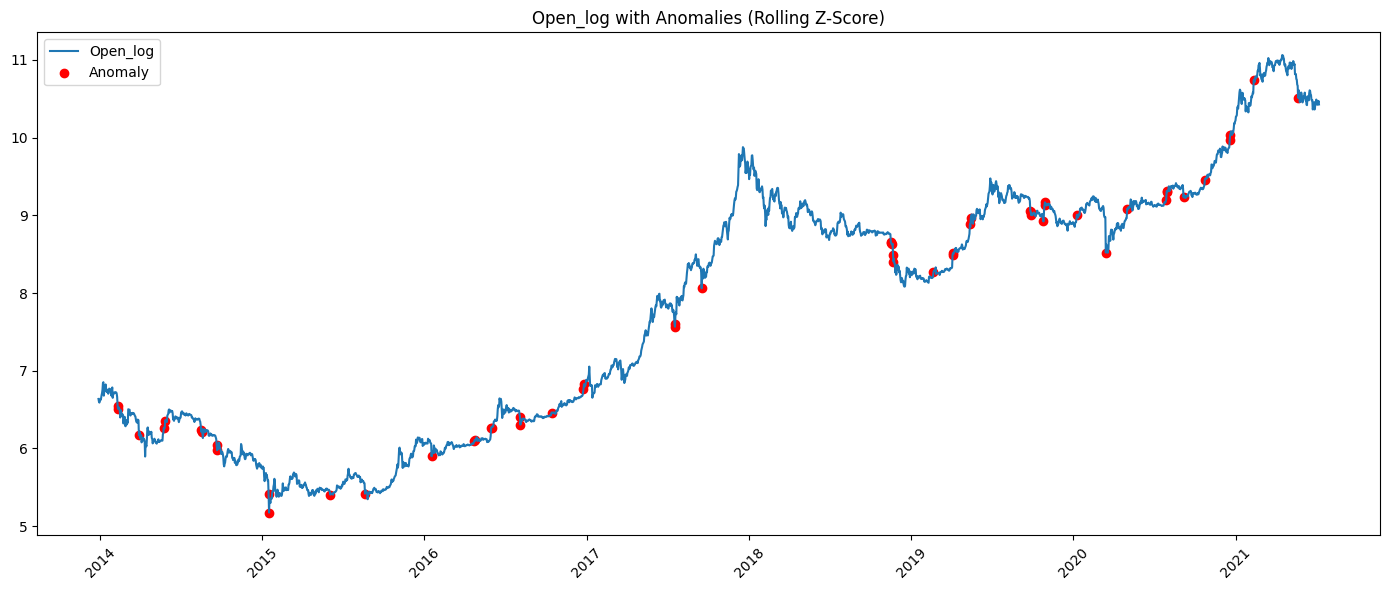

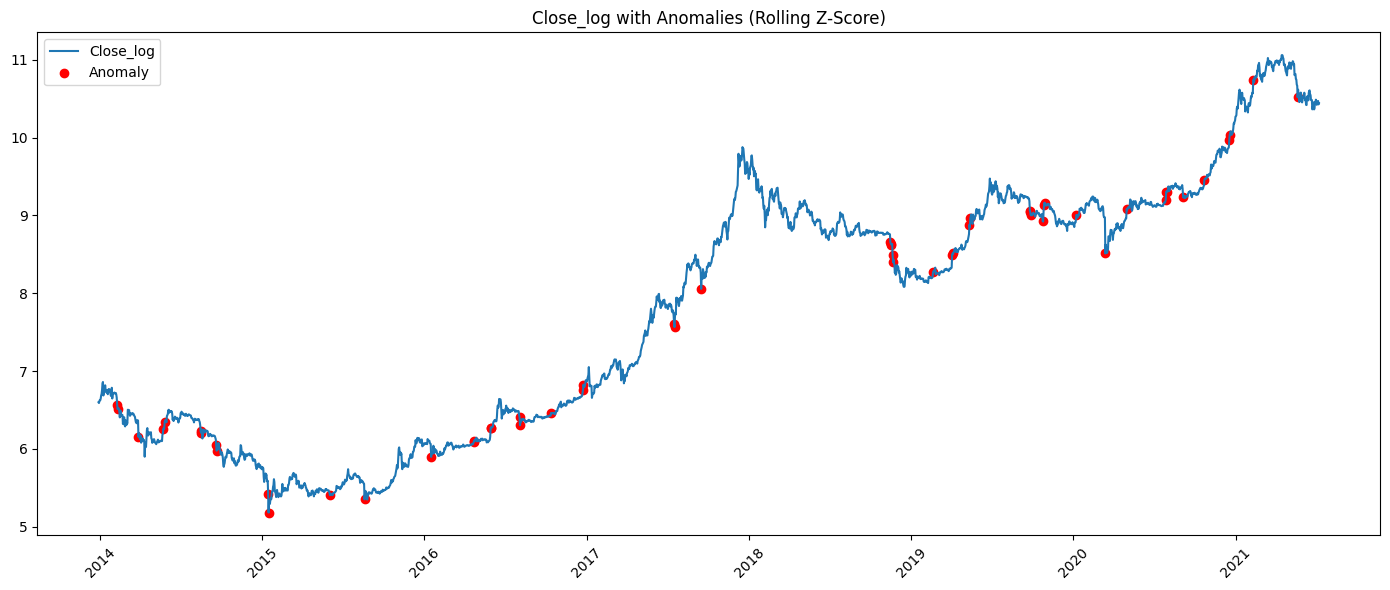

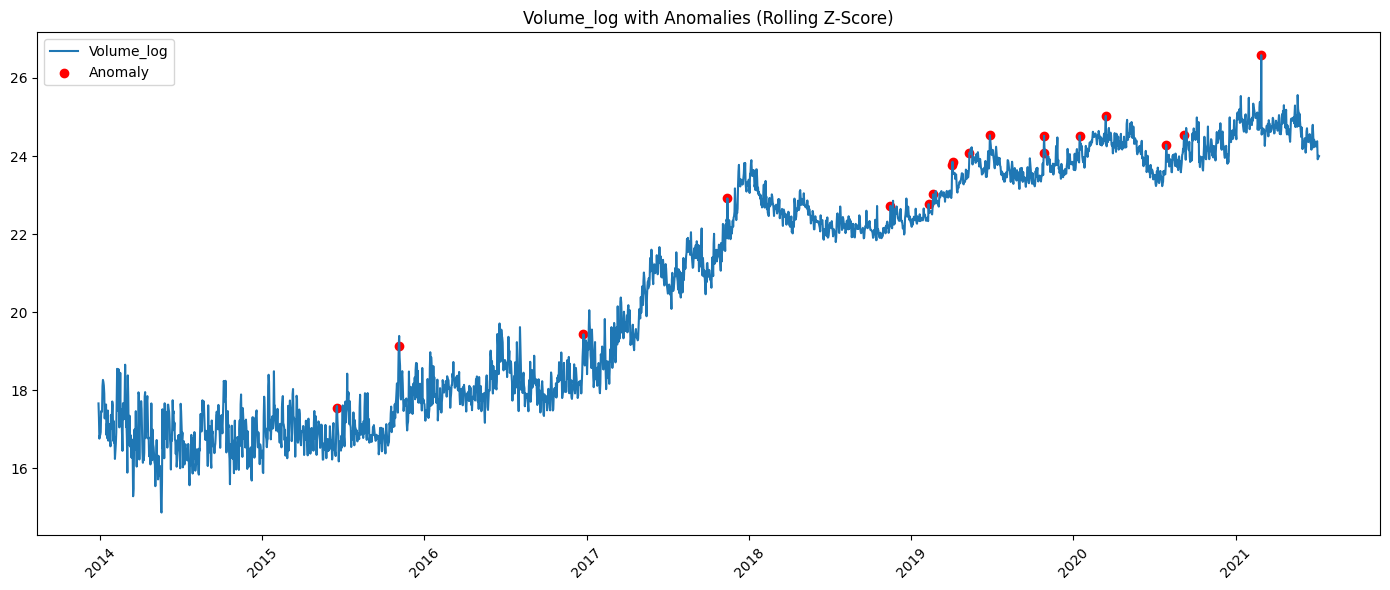

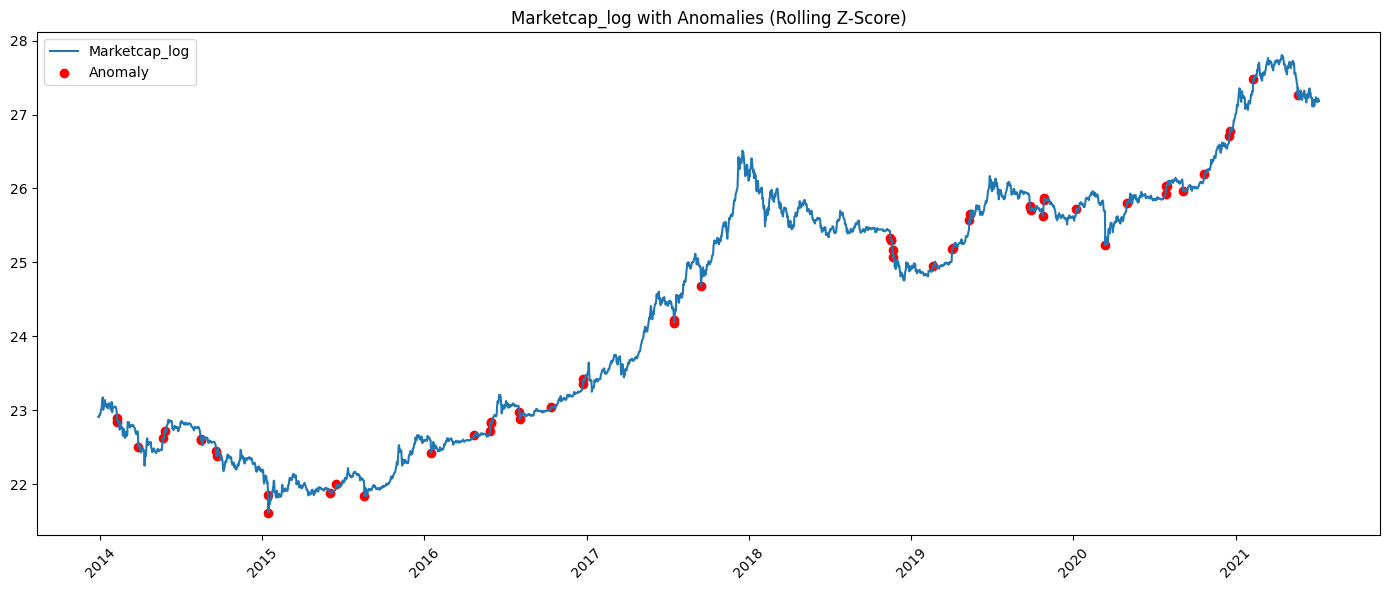

In [29]:
for col in cols:
    df = detect_and_plot_anomalies(df, col, window=30, threshold=3)

In [30]:
df[df[[col for col in df.columns if col.endswith('_anomaly')]].any(axis=1)] # Check for rows with at least one anomaly

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,...,Low_log_zscore,Low_log_anomaly,Open_log_zscore,Open_log_anomaly,Close_log_zscore,Close_log_anomaly,Volume_log_zscore,Volume_log_anomaly,Marketcap_log_zscore,Marketcap_log_anomaly
284,285,Bitcoin,BTC,2014-02-07 23:59:59,783.200012,654.349976,783.200012,712.400024,1.136430e+08,8.810607e+09,...,-4.158215,True,-1.878927,False,-3.375060,True,2.781054,False,-3.401239,True
285,286,Bitcoin,BTC,2014-02-08 23:59:59,721.820007,661.869995,699.570007,673.919983,3.874260e+07,8.337738e+09,...,-3.092500,True,-3.586441,True,-3.394707,True,0.720486,False,-3.423567,True
286,287,Bitcoin,BTC,2014-02-09 23:59:59,712.270020,655.250000,671.460022,682.900024,3.931140e+07,8.451229e+09,...,-2.699855,False,-3.329893,True,-2.661546,False,0.730239,False,-2.669633,False
287,288,Bitcoin,BTC,2014-02-10 23:59:59,703.710022,550.500000,681.320007,681.030029,1.127580e+08,8.430743e+09,...,-3.624390,True,-2.609685,False,-2.392637,False,2.504755,False,-2.393385,False
332,333,Bitcoin,BTC,2014-03-27 23:59:59,580.559998,471.239014,580.257019,471.239014,6.222540e+07,5.923616e+09,...,-3.013409,True,-0.722073,False,-3.330386,True,1.682721,False,-3.307453,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2842,2843,Bitcoin,BTC,2021-02-08 23:59:59,46203.931437,38076.322807,38886.827290,46196.463719,1.014672e+11,8.603427e+11,...,1.624974,False,1.309304,False,3.063063,True,1.838650,False,3.068598,True
2843,2844,Bitcoin,BTC,2021-02-09 23:59:59,48003.723962,45166.960045,46184.991466,46481.104236,9.180985e+10,8.656830e+11,...,3.053072,True,3.070159,True,2.680038,False,1.348498,False,2.683002,False
2860,2861,Bitcoin,BTC,2021-02-26 23:59:59,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11,...,0.332011,False,0.442993,False,0.291802,False,4.294183,True,0.295194,False
2942,2943,Bitcoin,BTC,2021-05-19 23:59:59,43546.116485,30681.496912,42944.975447,37002.440466,1.263581e+11,6.924526e+11,...,-3.894478,True,-2.438797,False,-3.194887,True,2.846615,False,-3.195114,True


## Objective
To identify abnormal patterns or spikes in cryptocurrency market data that may indicate unusual market activity, errors, or important events.

### Methodology
Technique: Rolling Z-Score
- Applied a rolling window of size 30 days.
- Anomalies were defined as values with an absolute z-score greater than 3.0.

### Visualization
For each feature, a time-series line plot was generated with anomalies marked in red.

### Next Steps
- Perform feature engineering: compute daily returns, volatility, and other derived metrics.

# Feature Engineering

In [31]:
df['log_return'] = df['Close_log'].diff() # Daily returns
df = df.dropna(subset=['log_return'])

In [32]:
df = df.iloc[28:] # Drop the rows with NaN after computing rolling z-scores for model training

In [33]:
df['log_high_low_spread'] = df['High_log'] - df['Low_log']  
df['log_close_open_return'] = df['Close_log'] - df['Open_log']

In [34]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,...,Open_log_anomaly,Close_log_zscore,Close_log_anomaly,Volume_log_zscore,Volume_log_anomaly,Marketcap_log_zscore,Marketcap_log_anomaly,log_return,log_high_low_spread,log_close_open_return
271,272,Bitcoin,BTC,2014-01-25 23:59:59,861.450012,792.960022,796.239990,853.609985,24303900.0,1.050954e+10,...,False,0.427701,False,-0.590588,False,0.503855,False,0.068532,0.082844,0.069574
272,273,Bitcoin,BTC,2014-01-26 23:59:59,897.020020,844.859985,853.679993,885.280029,32224300.0,1.090280e+10,...,False,0.925099,False,0.009131,False,0.994590,False,0.036430,0.059907,0.036348
273,274,Bitcoin,BTC,2014-01-27 23:59:59,893.000000,757.109985,884.599976,771.390015,49233600.0,9.503544e+09,...,False,-1.352202,False,0.841362,False,-1.242307,False,-0.137710,0.165078,-0.136941
274,275,Bitcoin,BTC,2014-01-28 23:59:59,832.500000,766.979980,774.020020,812.510010,44875500.0,1.001325e+10,...,False,-0.569347,False,0.604155,False,-0.466389,False,0.051934,0.081973,0.048530
275,276,Bitcoin,BTC,2014-01-29 23:59:59,836.869995,809.849976,809.960022,826.000000,17984400.0,1.018266e+10,...,False,-0.349598,False,-1.256508,False,-0.244356,False,0.016467,0.032820,0.019610


### Explanation
I created new features to help better understand how the crypto prices change every day. These features help find patterns and detect unusual events in the price data.

Features created:
- Daily Returns (Log): This shows how much the price changes from one day to the next, but in a way that looks at percentage changes instead of just the difference in price.
- High-Low Spread (Log): This shows the range between the highest and lowest price in a day, again using logs to look at relative changes.
- Close-Open Return (Log): This measures how much the price changed during the day, from the opening price to the closing price, using logs.
--------

# Summary of Feature Engineering and Anomaly Detection

In this notebook, we performed exploratory data analysis and feature engineering on historical cryptocurrency price data. We focused on preparing the dataset to detect anomalies in real-time price movements. Key steps included:

- **Data Cleaning:** Handling missing values and ensuring date formatting.

- **Log Transformation:** Applied logarithmic transformation to price and volume data to stabilize variance and normalize distributions.

- **Daily Log Returns:** Calculated daily log returns to capture the percentage change in prices.

- **Volatility Features:** Created features like log high-low spread and log close-open return to measure daily price volatility and intraday movements.

- **Rolling Z-Scores:** Used rolling windows to compute z-scores for log-transformed price and volume features, helping to identify potential anomalies.

- **Anomaly Flags:** Marked anomalies based on z-score thresholds, highlighting spikes or drops in price or volume.

---

## Next Steps

1. **Model Selection and Training:**  
   Use these engineered features as input to train an anomaly detection model (e.g. Isolation Forest, One-Class SVM)
   
2. **Model Evaluation:**  
   Evaluate model performance using historical known anomalies or by analyzing detected anomalies qualitatively.

3. **Model Serving:**  
   Wrap the trained model using BentoML to create a REST API for real-time anomaly detection on live cryptocurrency data.

4. **Monitoring:**  
   Use Evidently AI to monitor data drift and anomaly rates over time to ensure the model stays accurate as market conditions change.

5. **Automation:**  
   Implement GitHub Actions to automate testing, retraining, and deployment pipelines, enabling continuous integration and delivery (CI/CD).

In [35]:
# Export cleaned & processed dataset to the data directory for model training
df.to_csv("../data/processed_crypto_data.csv", index=False)